In [ ]:
# Import necessary libraries
import pandas as pd  # Pandas for data handling
import numpy as np    # NumPy for numerical operations
import matplotlib.pyplot as plt  # Matplotlib for plotting
import math  # Math for mathematical functions
import time  # Time for time-related operations

In [59]:
# Define sample data for the AND logic gate

data = [[0,0,0],[0,1,0],[1,0,0],[1,1,1]]

# Create a DataFrame to represent the AND logic table
and_table = pd.DataFrame(data, columns=['A', 'B', 'result'])
and_table

,A,B,result
0,0,0,0
1,0,1,0
2,1,0,0
3,1,1,1


In [ ]:
# Implements a step function
def step_function(x):
  if x>0:
    return 1
  else:
    return 0

In [ ]:
# Implements a bipolar step function
def bipolar_function(x):
  if x>0:
    return 1
  elif x == 0:
    return 0
  else:
    return -1

In [ ]:
# Implements a sigmoid function.
def sigmoid_function(x):
  return (1/(1+(math.e**-x)))

In [ ]:
# Implements the Rectified Linear Unit (ReLU) activation function
def relu(x):
  if x>0:
    return x
  else:
    return 0

In [ ]:
# Calculates the weighted sum of inputs with bias
'''     x1 (float): Input 1.
        x2 (float): Input 2.
        w0 (float): Bias (weight for the bias term).
        w1 (float): Weight for input x1.
        w2 (float): Weight for input x2.'''
def summation_unit(x1,x2,w0,w1,w2):
  return (w0)+(x1*w1)+(x2*w2)

In [ ]:
# Calculates the weighted sum of input data points.

'''   Args:
        x0 (float): Input data point 0.
        x1 (float): Input data point 1.
        x2 (float): Input data point 2.
        w0 (float): Weight for input data point 0.
        w1 (float): Weight for input data point 1.
        w2 (float): Weight for input data point 2.'''
def summation_data(x0,x1,x2,w0,w1,w2):
  return (x0*w0)+(x1*w1)+(x2*w2)

# A1. Develop the above perceptron in your own code (don’t use the perceptron model available from package). Use the initial weights as provided below. W0 = 10, W1 = 0.2, w2 = -0.75, learning rate (α) = 0.05


Converged after epoch count: 18


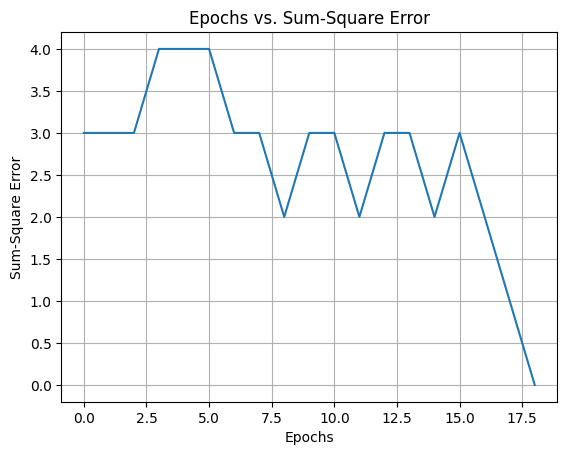

Final weights ==> w0: -1.5  w1: 1.2  w2: 0.75
Calculated Output: 0
Real Output: 0
Calculated Output: 0
Real Output: 0
Calculated Output: 0
Real Output: 0
Calculated Output: 1
Real Output: 1


In [ ]:
# Initial weights and learning rate
w0 = 10
w1 = 0.2
w2 = -0.75
learning_rate = 0.5

# Initialize counters and lists to track epoch and error values
epoch_count = 0
epochs = []
sum_square_error = []

# Training loop with a maximum of 100 epochs
while epoch_count < 100:
    error = 0

    # Loop through the AND gate data
    for index, row in and_table.iterrows():
        # Calculate the weighted sum (summation unit)
        weighted_sum = row['A'] * w1 + row['B'] * w2 + w0

        # Define a step function (you can replace this with the desired activation function)
        def step_function(x):
            return 1 if x >= 0 else 0

        # Calculate the predicted output using the step function
        predicted_output = step_function(weighted_sum)

        # Calculate the error
        e = row['result'] - predicted_output

        # Update weights using the perceptron learning rule
        w0 += learning_rate * e
        w1 += learning_rate * e * row['A']
        w2 += learning_rate * e * row['B']

        # Accumulate the error for this epoch
        error += e ** 2

    # Record epoch and error values
    epochs.append(epoch_count)
    sum_square_error.append(error)

    # Check for convergence (error threshold of 0.002)
    if error < 0.002:
        print("Converged after epoch count:", epoch_count)
        break

    # Increment the epoch count
    epoch_count += 1

# Plot epochs vs. sum-square error
plt.plot(epochs, sum_square_error)
plt.xlabel('Epochs')
plt.ylabel('Sum-Square Error')
plt.title('Epochs vs. Sum-Square Error')
plt.grid()
plt.show()

# Print the final learned weights
print("Final weights ==> w0:", w0, " w1:", w1, " w2:", w2)

# Test the perceptron with AND gate inputs and print calculated and real outputs
for index, row in and_table.iterrows():
    calculated_output = step_function(row['A'] * w1 + row['B'] * w2 + w0)
    print("Calculated Output:", calculated_output)
    print("Real Output:", row['result'])


# A2. Repeat the above A1 experiment with following activation functions. Compare the iterations taken to converge against each of the activation functions. Keep the learning rate same as A1.

# Bipolar function

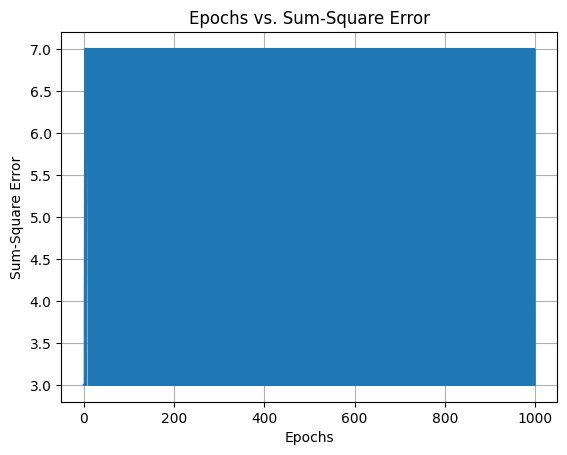

Final weights ==> w0: -1.0  w1: 1.2  w2: 1.25
1000
Calculated Output: -1
Real Output: 0
Calculated Output: 1
Real Output: 0
Calculated Output: 1
Real Output: 0
Calculated Output: 1
Real Output: 1


In [ ]:
# Initial weights and learning rate
w0 = 10
w1 = 0.2
w2 = -0.75
learning_rate = 0.5

# Initialize counters and lists to track epoch and error values
epoch_count = 0
epochs = []
sum_square_error = []

# Training loop with a maximum of 1000 epochs
while epoch_count < 1000:
    error = 0

    # Loop through the AND gate data
    for index, row in and_table.iterrows():
        # Calculate the weighted sum (summation unit)
        weighted_sum = row['A'] * w1 + row['B'] * w2 + w0

        # Define a bipolar step function (you can replace this with the desired activation function)
        def bipolar_function(x):
            return -1 if x < 0 else 1

        # Calculate the predicted output using the bipolar step function
        predicted_output = bipolar_function(weighted_sum)

        # Calculate the error
        e = row['result'] - predicted_output

        # Update weights using the perceptron learning rule
        w0 += learning_rate * e
        w1 += learning_rate * e * row['A']
        w2 += learning_rate * e * row['B']

        # Accumulate the error for this epoch
        error += e ** 2

    # Record epoch and error values
    epochs.append(epoch_count)
    sum_square_error.append(error)

    # Check for convergence (error threshold of 0.002)
    if error < 0.002:
        print("Converged after epoch count:", epoch_count)
        break

    # Increment the epoch count
    epoch_count += 1

# Plot epochs vs. sum-square error
plt.plot(epochs, sum_square_error)
plt.xlabel('Epochs')
plt.ylabel('Sum-Square Error')
plt.title('Epochs vs. Sum-Square Error')
plt.grid()
plt.show()

# Print the final learned weights
print("Final weights ==> w0:", w0, " w1:", w1, " w2:", w2)
print(epoch_count)

# Test the perceptron with AND gate inputs and print calculated and real outputs
for index, row in and_table.iterrows():
    calculated_output = bipolar_function(row['A'] * w1 + row['B'] * w2 + w0)
    print("Calculated Output:", calculated_output)
    print("Real Output:", row['result'])


# Sigmoid function


Converged after epoch count: 451


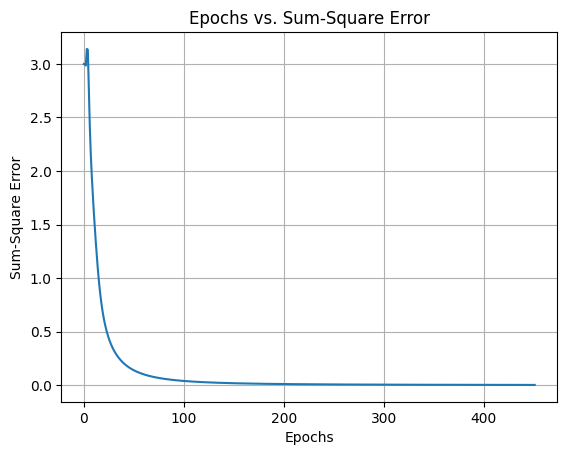

Final weights ==> w0: -11.01406446456043  w1: 7.251651917633865  w2: 7.237613596313013
Calculated Output: 1.646817326382425e-05
Real Output: 0
Calculated Output: 0.022390996364954657
Real Output: 0
Calculated Output: 0.022700359304807006
Real Output: 0
Calculated Output: 0.969973867639686
Real Output: 1


In [ ]:
# Initial weights and learning rate
w0 = 10
w1 = 0.2
w2 = -0.75
learning_rate = 0.5

# Initialize counters and lists to track epoch and error values
epoch_count = 0
epochs = []
sum_square_error = []

# Training loop with a maximum of 1000 epochs
while epoch_count < 1000:
    error = 0

    # Loop through the AND gate data
    for index, row in and_table.iterrows():
        # Calculate the weighted sum (summation unit)
        weighted_sum = row['A'] * w1 + row['B'] * w2 + w0

        # Define a sigmoid function (you can replace this with the desired activation function)
        def sigmoid_function(x):
            return 1 / (1 + np.exp(-x))

        # Calculate the predicted output using the sigmoid function
        predicted_output = sigmoid_function(weighted_sum)

        # Calculate the error
        e = row['result'] - predicted_output

        # Update weights using the perceptron learning rule
        w0 += learning_rate * e
        w1 += learning_rate * e * row['A']
        w2 += learning_rate * e * row['B']

        # Accumulate the error for this epoch
        error += e ** 2

    # Record epoch and error values
    epochs.append(epoch_count)
    sum_square_error.append(error)

    # Check for convergence (error threshold of 0.002)
    if error < 0.002:
        print("Converged after epoch count:", epoch_count)
        break

    # Increment the epoch count
    epoch_count += 1

# Plot epochs vs. sum-square error
plt.plot(epochs, sum_square_error)
plt.xlabel('Epochs')
plt.ylabel('Sum-Square Error')
plt.title('Epochs vs. Sum-Square Error')
plt.grid()
plt.show()

# Print the final learned weights
print("Final weights ==> w0:", w0, " w1:", w1, " w2:", w2)

# Test the perceptron with AND gate inputs and print calculated and real outputs
for index, row in and_table.iterrows():
    calculated_output = sigmoid_function(row['A'] * w1 + row['B'] * w2 + w0)
    print("Calculated Output:", calculated_output)
    print("Real Output:", row['result'])


# ReLU function


Converged after epoch count: 20


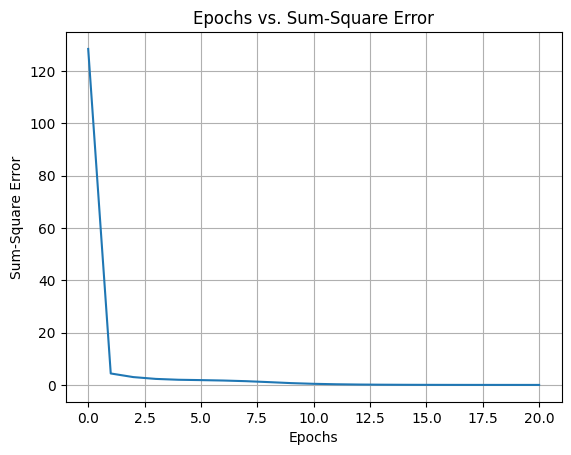

Final weights ==> w0: -0.9744791024733842  w1: 0.9999852734617888  w2: 0.9872469145057977
calculated output :  0
Real Output: 0
calculated output :  0.012767812032413506
Real Output: 0
calculated output :  0.025506170988404575
Real Output: 0
calculated output :  1.0127530854942024
Real Output: 1


In [ ]:
# Initial weights and learning rate
w0 = 10
w1 = 0.2
w2 = -0.75
learning_rate = 0.5

# Initialize counters and lists to track epoch and error values
epoch_count = 0
epochs = []
sum_square_error = []

# Training loop with a maximum of 1000 epochs
while epoch_count < 1000:
    error = 0

    # Loop through the AND gate data
    for index, row in and_table.iterrows():
        # Calculate the weighted sum (summation unit)
        weighted_sum = row['A'] * w1 + row['B'] * w2 + w0

        # Define a ReLU function (you can replace this with the desired activation function)
        def relu(x):
            return max(0, x)

        # Calculate the predicted output using the ReLU function
        predicted_output = relu(weighted_sum)

        # Calculate the error
        e = row['result'] - predicted_output

        # Update weights using the perceptron learning rule
        w0 += learning_rate * e
        w1 += learning_rate * e * row['A']
        w2 += learning_rate * e * row['B']

        # Accumulate the error for this epoch
        error += e ** 2

    # Record epoch and error values
    epochs.append(epoch_count)
    sum_square_error.append(error)

    # Check for convergence (error threshold of 0.002)
    if error < 0.002:
        print("Converged after epoch count:", epoch_count)
        break

    # Increment the epoch count
    epoch_count += 1

# Plot epochs vs. sum-square error
plt.plot(epochs, sum_square_error)
plt.xlabel('Epochs')
plt.ylabel('Sum-Square Error')
plt.title('Epochs vs. Sum-Square Error')
plt.grid()
plt.show()

# Print the final learned weights
print("Final weights ==> w0:", w0, " w1:", w1, " w2:", w2)

# Test the perceptron with AND gate inputs and print real outputs
for index, row in and_table.iterrows():
    print("calculated output : ",relu(summation_unit(row['A'],row['B'],w0,w1,w2)))
    print("Real Output:", row['result'])


# A3. Repeat exercise A1 with varying the learning rate, keeping the initial weights same. Take learning rate = {0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1}. Make a plot of the number of iterations taken for learning to converge against the learning rates.

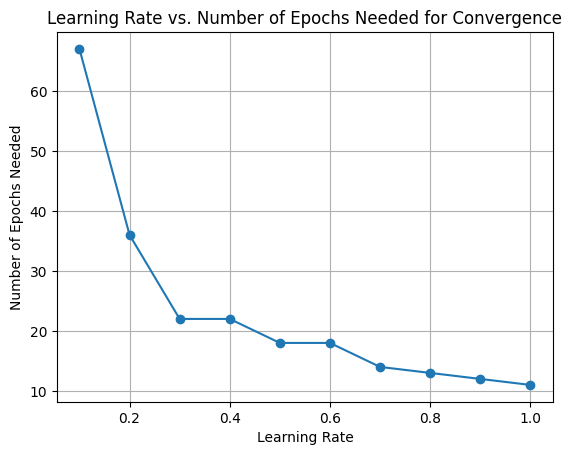

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# List of learning rates to experiment with
learning_rates = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

# Initialize a list to store the number of epochs needed for convergence for each learning rate
number_of_epochs_needed = []

for learning_rate in learning_rates:
    # Initialize weights
    w0 = 10
    w1 = 0.2
    w2 = -0.75

    # Initialize epoch count and lists to track epoch and error values
    epoch_count = 0
    epochs = []
    sum_square_errors = []

    # Maximum number of epochs for training (in case it doesn't converge)
    max_epochs = 100

    while epoch_count < max_epochs:
        error = 0

        # Loop through the AND gate data
        for index, row in and_table.iterrows():
            # Calculate the weighted sum (summation unit)
            weighted_sum = row['A'] * w1 + row['B'] * w2 + w0

            # Define a step function (you can replace this with the desired activation function)
            def step_function(x):
                return 1 if x >= 0 else 0

            # Calculate the predicted output using the step function
            predicted_output = step_function(weighted_sum)

            # Calculate the error
            e = row['result'] - predicted_output

            # Update weights
            w0 += learning_rate * e
            w1 += learning_rate * e * row['A']
            w2 += learning_rate * e * row['B']

            # Accumulate the error for this epoch
            error += e ** 2

        # Record epoch and error values
        epochs.append(epoch_count)
        sum_square_errors.append(error)

        # Check for convergence (error threshold of 0.002)
        if error < 0.002:
            number_of_epochs_needed.append(epoch_count)
            break

        # Increment the epoch count
        epoch_count += 1

# Plot learning rates vs. number of epochs needed for convergence
plt.plot(learning_rates, number_of_epochs_needed, marker='o')
plt.xlabel('Learning Rate')
plt.ylabel('Number of Epochs Needed')
plt.title('Learning Rate vs. Number of Epochs Needed for Convergence')
plt.grid()
plt.show()


# A4. Repeat the above exercises, A1 to A3, for XOR gate logic.

In [ ]:
Xor = [[0,0,0],[0,1,1],[1,0,1],[1,1,0]]
xor_table = pd.DataFrame(Xor,columns=['A','B','result'])

In [ ]:
xor_table

,A,B,result
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,0


# A1 for xor_gate


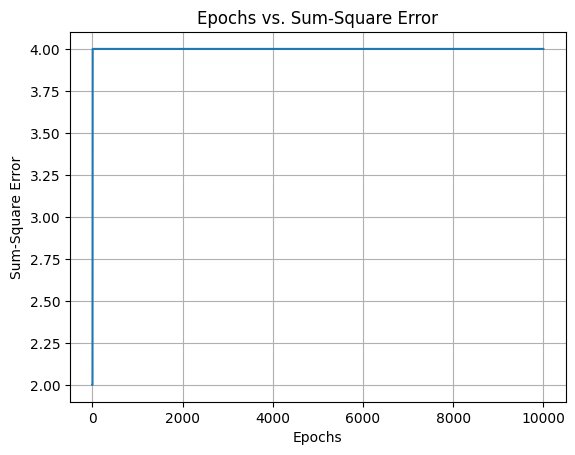

Final weights ==> w0: 0.0  w1: -0.5  w2: 0.0
10000
Calculated Output: 1
Real Output: 0
Calculated Output: 1
Real Output: 1
Calculated Output: 0
Real Output: 1
Calculated Output: 0
Real Output: 0


In [ ]:
# Initial weights and learning rate
w0 = 1
w1 = 1
w2 = 1
learning_rate = 0.5

# Initialize counters and lists to track epoch and error values
epoch_count = 0
epochs = []
sum_square_error = []

# Training loop with a maximum of 10,000 epochs
while epoch_count < 10000:
    error = 0

    # Loop through the XOR gate data
    for index, row in xor_table.iterrows():
        # Calculate the weighted sum (summation unit)
        weighted_sum = row['A'] * w1 + row['B'] * w2 + w0

        # Define a step function (you can replace this with the desired activation function)
        def step_function(x):
            return 1 if x >= 0 else 0

        # Calculate the predicted output using the step function
        predicted_output = step_function(weighted_sum)

        # Calculate the error
        e = row['result'] - predicted_output

        # Update weights using the perceptron learning rule
        w0 += learning_rate * e
        w1 += learning_rate * e * row['A']
        w2 += learning_rate * e * row['B']

        # Accumulate the error for this epoch
        error += e ** 2

    # Record epoch and error values
    epochs.append(epoch_count)
    sum_square_error.append(error)

    # Check for convergence (error threshold of 0.002)
    if error < 0.002:
        print("Converged after epoch count:", epoch_count)
        break

    # Increment the epoch count
    epoch_count += 1

# Plot epochs vs. sum-square error
plt.plot(epochs, sum_square_error)
plt.xlabel('Epochs')
plt.ylabel('Sum-Square Error')
plt.title('Epochs vs. Sum-Square Error')
plt.grid()
plt.show()

# Print the final learned weights
print("Final weights ==> w0:", w0, " w1:", w1, " w2:", w2)
print(epoch_count)
# Test the perceptron with XOR gate inputs and print calculated and real outputs
for index, row in xor_table.iterrows():
    calculated_output = step_function(row['A'] * w1 + row['B'] * w2 + w0)
    print("Calculated Output:", calculated_output)
    print("Real Output:", row['result'])


# A2 for xor_gate

# Bi-Polar Step function

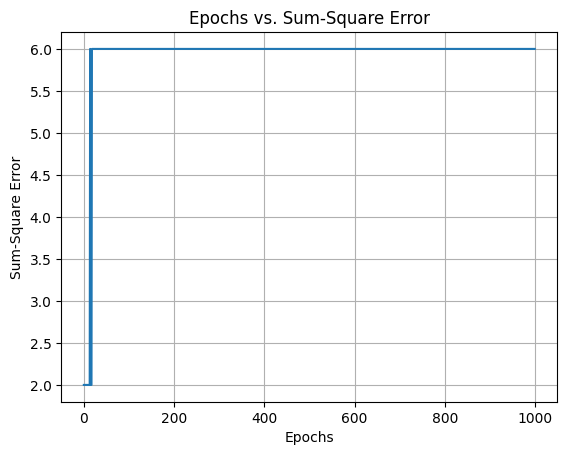

Final weights ==> w0: 1.0  w1: -0.7999999999999998  w2: -0.75
Calculated Output: 1
Real Output: 0
Calculated Output: 1
Real Output: 0
Calculated Output: 1
Real Output: 0
Calculated Output: -1
Real Output: 1


In [ ]:
# Initial weights and learning rate
w0 = 10
w1 = 0.2
w2 = -0.75
learning_rate = 0.5

# Initialize counters and lists to track epoch and error values
epoch_count = 0
epochs = []
sum_square_error = []

# Training loop with a maximum of 1000 epochs
while epoch_count < 1000:
    error = 0

    # Loop through the AND gate data
    for index, row in xor_table.iterrows():
        # Calculate the weighted sum (summation unit)
        weighted_sum = row['A'] * w1 + row['B'] * w2 + w0

        # Define a bipolar step function (you can replace this with the desired activation function)
        def bipolar_function(x):
            return -1 if x < 0 else 1

        # Calculate the predicted output using the bipolar step function
        predicted_output = bipolar_function(weighted_sum)
        # Calculate the error
        e = row['result'] - predicted_output

        # Update weights using the perceptron learning rule
        w0 += learning_rate * e
        w1 += learning_rate * e * row['A']
        w2 += learning_rate * e * row['B']

        # Accumulate the error for this epoch
        error += e ** 2

    # Record epoch and error values
    epochs.append(epoch_count)
    sum_square_error.append(error)

    # Check for convergence (error threshold of 0.002)
    if error < 0.002:
        print("Converged after epoch count:", epoch_count)
        break

    # Increment the epoch count
    epoch_count += 1

# Plot epochs vs. sum-square error
plt.plot(epochs, sum_square_error)
plt.xlabel('Epochs')
plt.ylabel('Sum-Square Error')
plt.title('Epochs vs. Sum-Square Error')
plt.grid()
plt.show()

# Print the final learned weights
print("Final weights ==> w0:", w0, " w1:", w1, " w2:", w2)

# Test the perceptron with AND gate inputs and print calculated and real outputs
for index, row in and_table.iterrows():
    calculated_output = bipolar_function(row['A'] * w1 + row['B'] * w2 + w0)
    print("Calculated Output:", calculated_output)
    print("Real Output:", row['result'])


# Sigmoid function

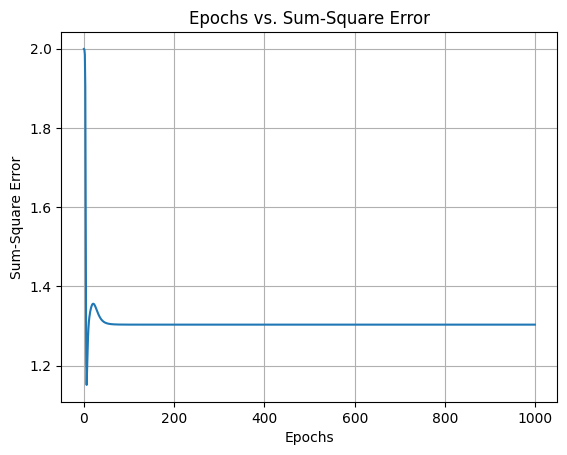

Final weights ==> w0: 0.2854396608267673  w1: -0.5708793216535337  w2: -0.28543966082676675
Calculated Output: 0.5708793216535331
Real Output: 0
Calculated Output: 0.5000000000000001
Real Output: 0
Calculated Output: 0.42912067834646717
Real Output: 0
Calculated Output: 0.3610339507358464
Real Output: 1


In [ ]:
# Initial weights and learning rate
w0 = 10
w1 = 0.2
w2 = -0.75
learning_rate = 0.5

# Initialize counters and lists to track epoch and error values
epoch_count = 0
epochs = []
sum_square_error = []

# Training loop with a maximum of 1000 epochs
while epoch_count < 1000:
    error = 0

    # Loop through the Xor gate data
    for index, row in xor_table.iterrows():
        # Calculate the weighted sum (summation unit)
        weighted_sum = row['A'] * w1 + row['B'] * w2 + w0

        # Define a sigmoid function (you can replace this with the desired activation function)
        def sigmoid_function(x):
            return 1 / (1 + np.exp(-x))

        # Calculate the predicted output using the sigmoid function
        predicted_output = sigmoid_function(weighted_sum)

        # Calculate the error
        e = row['result'] - predicted_output

        # Update weights using the perceptron learning rule
        w0 += learning_rate * e
        w1 += learning_rate * e * row['A']
        w2 += learning_rate * e * row['B']

        # Accumulate the error for this epoch
        error += e ** 2

    # Record epoch and error values
    epochs.append(epoch_count)
    sum_square_error.append(error)

    # Check for convergence (error threshold of 0.002)
    if error < 0.002:
        print("Converged after epoch count:", epoch_count)
        break

    # Increment the epoch count
    epoch_count += 1

# Plot epochs vs. sum-square error
plt.plot(epochs, sum_square_error)
plt.xlabel('Epochs')
plt.ylabel('Sum-Square Error')
plt.title('Epochs vs. Sum-Square Error')
plt.grid()
plt.show()

# Print the final learned weights
print("Final weights ==> w0:", w0, " w1:", w1, " w2:", w2)

# Test the perceptron with AND gate inputs and print calculated and real outputs
for index, row in and_table.iterrows():
    calculated_output = sigmoid_function(row['A'] * w1 + row['B'] * w2 + w0)
    print("Calculated Output:", calculated_output)
    print("Real Output:", row['result'])

# ReLU function

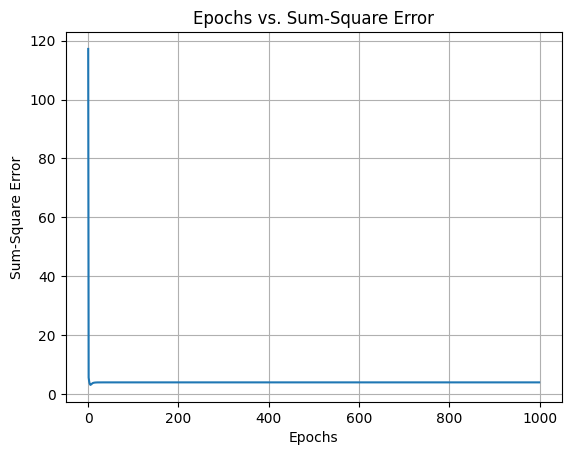

Final weights ==> w0: 0.9999999999999998  w1: -0.9999999999999998  w2: -0.49999999999999994
calculated output :  0.9999999999999998
Real Output: 0
calculated output :  0.49999999999999983
Real Output: 0
calculated output :  0
Real Output: 0
calculated output :  0
Real Output: 1


In [ ]:
# Initial weights and learning rate
w0 = 10
w1 = 0.2
w2 = -0.75
learning_rate = 0.5

# Initialize counters and lists to track epoch and error values
epoch_count = 0
epochs = []
sum_square_error = []

# Training loop with a maximum of 1000 epochs
while epoch_count < 1000:
    error = 0

    # Loop through the xor gate data
    for index, row in xor_table.iterrows():
        # Calculate the weighted sum (summation unit)
        weighted_sum = row['A'] * w1 + row['B'] * w2 + w0

        # Define a ReLU function (you can replace this with the desired activation function)
        def relu(x):
            return max(0, x)

        # Calculate the predicted output using the ReLU function
        predicted_output = relu(weighted_sum)

        # Calculate the error
        e = row['result'] - predicted_output

        # Update weights using the perceptron learning rule
        w0 += learning_rate * e
        w1 += learning_rate * e * row['A']
        w2 += learning_rate * e * row['B']

        # Accumulate the error for this epoch
        error += e ** 2

    # Record epoch and error values
    epochs.append(epoch_count)
    sum_square_error.append(error)

    # Check for convergence (error threshold of 0.002)
    if error < 0.002:
        print("Converged after epoch count:", epoch_count)
        break

    # Increment the epoch count
    epoch_count += 1

# Plot epochs vs. sum-square error
plt.plot(epochs, sum_square_error)
plt.xlabel('Epochs')
plt.ylabel('Sum-Square Error')
plt.title('Epochs vs. Sum-Square Error')
plt.grid()
plt.show()

# Print the final learned weights
print("Final weights ==> w0:", w0, " w1:", w1, " w2:", w2)

# Test the perceptron with AND gate inputs and print real outputs
for index, row in and_table.iterrows():
    print("calculated output : ",relu(summation_unit(row['A'],row['B'],w0,w1,w2)))
    print("Real Output:", row['result'])


# A3 for XOR gate

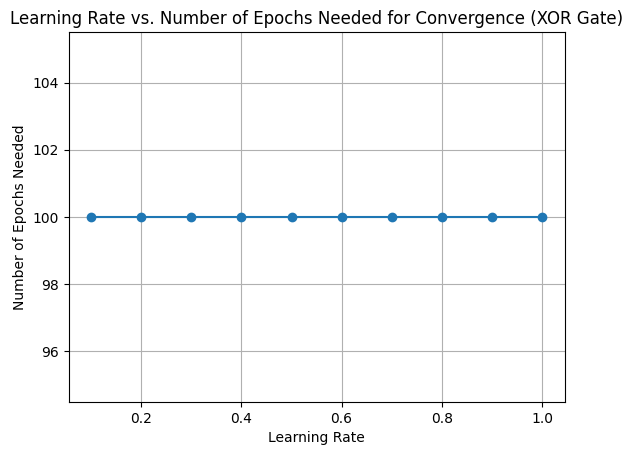

100


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# List of learning rates to experiment with
learning_rates = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

# Initialize a list to store the number of epochs needed for convergence for each learning rate
number_of_epochs_needed = []

for learning_rate in learning_rates:
    # Initialize weights
    w0 = 10
    w1 = 0.2
    w2 = -0.75

    # Initialize epoch count and lists to track epoch and error values
    epoch_count = 0
    epochs = []
    sum_square_errors = []

    # XOR gate data
    xortable = [
        {'A': 0, 'B': 0, 'result': 0},
        {'A': 0, 'B': 1, 'result': 1},
        {'A': 1, 'B': 0, 'result': 1},
        {'A': 1, 'B': 1, 'result': 0}
    ]

    # Maximum number of epochs for training (in case it doesn't converge)
    max_epochs = 100

    while epoch_count < max_epochs:
        error = 0

        # Loop through the XOR gate data
        for row in xortable:
            # Calculate the weighted sum (summation unit)
            weighted_sum = row['A'] * w1 + row['B'] * w2 + w0

            # Define a step function (you can replace this with the desired activation function)
            def step_function(x):
                return 1 if x >= 0 else 0

            # Calculate the predicted output using the step function
            predicted_output = step_function(weighted_sum)

            # Calculate the error
            e = row['result'] - predicted_output

            # Update weights
            w0 += learning_rate * e
            w1 += learning_rate * e * row['A']
            w2 += learning_rate * e * row['B']

            # Accumulate the error for this epoch
            error += e ** 2

        # Record epoch and error values
        epochs.append(epoch_count)
        sum_square_errors.append(error)

        # Check for convergence (error threshold of 0.002)
        if error < 0.002:
            break

        # Increment the epoch count
        epoch_count += 1

    # Append the number of epochs needed to converge for this learning rate
    number_of_epochs_needed.append(epoch_count)

# Plot learning rates vs. number of epochs needed for convergence
plt.plot(learning_rates, number_of_epochs_needed, marker='o')
plt.xlabel('Learning Rate')
plt.ylabel('Number of Epochs Needed')
plt.title('Learning Rate vs. Number of Epochs Needed for Convergence (XOR Gate)')
plt.grid()
plt.show()
print(epoch_count)


<ipython-input-21-ac7f122d6085>:19: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


Converged after epoch count: 503


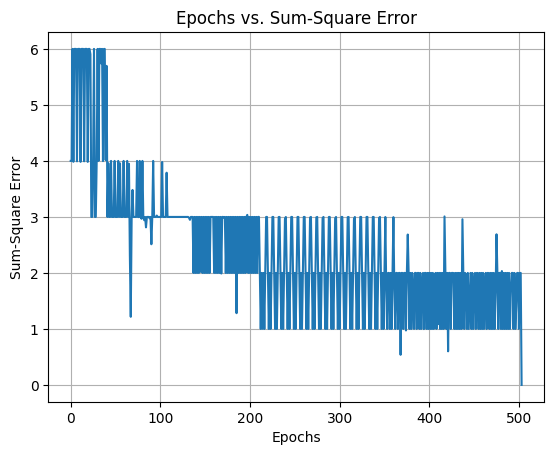

Final weights ==> w0: -3.621316356315513  w1: -53.48035135810678  w2: 8.403547545518459  w3: -21.15004489917351  w4: 4.613955460272609
   Candies  Mangoes  MilkPackets  Payment  PredictedOutput
0       17        5            3      320     1.000000e+00
1       23        2            4      150    2.261180e-265


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define customer data with features
data = pd.DataFrame({
    'Candies': [20, 16, 27, 19, 24, 22, 15, 18, 21, 16],
    'Mangoes': [6, 3, 6, 1, 4, 1, 4, 4, 1, 2],
    'MilkPackets': [2, 6, 2, 2, 2, 5, 2, 2, 4, 4],
    'Payment': [386, 289, 393, 110, 280, 167, 271, 274, 148, 198],
    'HighValueTx': ['Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'No']
})

# Map 'Yes' to 1 and 'No' to 0 for 'HighValueTx' column
data['HighValueTx'] = data['HighValueTx'].map({'Yes': 1, 'No': 0})

# Define the sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Initialize weights and learning rate
w0 = 0.1
w1 = 0.2
w2 = 0.3
w3 = 0.4
w4 = 0.5
learning_rate = 0.01

# Initialize epoch count and lists to track epoch and error values
epoch_count = 0
epochs = []
sum_square_errors = []

# Maximum number of epochs for training (in case it doesn't converge)
max_epochs = 1000

while epoch_count < max_epochs:
    error = 0

    for index, row in data.iterrows():
        # Calculate the weighted sum (summation unit)
        weighted_sum = w0 + w1 * row['Candies'] + w2 * row['Mangoes'] + w3 * row['MilkPackets'] + w4 * row['Payment']

        # Calculate the predicted output using the sigmoid function
        predicted_output = sigmoid(weighted_sum)

        # Calculate the error
        e = row['HighValueTx'] - predicted_output

        # Update weights using the perceptron learning rule
        w0 += learning_rate * e
        w1 += learning_rate * e * row['Candies']
        w2 += learning_rate * e * row['Mangoes']
        w3 += learning_rate * e * row['MilkPackets']
        w4 += learning_rate * e * row['Payment']

        # Accumulate the error for this epoch
        error += e ** 2

    # Record epoch and error values
    epochs.append(epoch_count)
    sum_square_errors.append(error)

    # Check for convergence (error threshold of 0.002)
    if error < 0.002:
        print("Converged after epoch count:", epoch_count)
        break

    # Increment the epoch count
    epoch_count += 1

# Plot epochs vs. sum-square error
plt.plot(epochs, sum_square_errors)
plt.xlabel('Epochs')
plt.ylabel('Sum-Square Error')
plt.title('Epochs vs. Sum-Square Error')
plt.grid()
plt.show()

# Print the final learned weights
print("Final weights ==> w0:", w0, " w1:", w1, " w2:", w2, " w3:", w3, " w4:", w4)

# Test the perceptron with sample data and print predicted outputs
sample_data = pd.DataFrame({
    'Candies': [17, 23],
    'Mangoes': [5, 2],
    'MilkPackets': [3, 4],
    'Payment': [320, 150]
})

predicted_outputs = []
for index, row in sample_data.iterrows():
    weighted_sum = w0 + w1 * row['Candies'] + w2 * row['Mangoes'] + w3 * row['MilkPackets'] + w4 * row['Payment']
    predicted_output = sigmoid(weighted_sum)
    predicted_outputs.append(predicted_output)

sample_data['PredictedOutput'] = predicted_outputs
print(sample_data)



In [ ]:

# Load data from an Excel file into a Pandas DataFrame
products_dataframe = pd.read_excel("Lab Session1 Data.xlsx")

# Display the first few rows of the DataFrame for a quick overview
products_dataframe.head()

,Customer,Candies (#),Mangoes (Kg),Milk Packets (#),Payment (Rs),Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Candy,Mango,Milk
0,C_1,20,6,2,386,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,55.0,18.0
1,C_2,16,3,6,289,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,C_3,27,6,2,393,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,C_4,19,1,2,110,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,C_5,24,4,2,280,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# using matrix inversion:

# Select columns from the DataFrame
A = products_dataframe[['Candies (#)', 'Mangoes (Kg)', 'Milk Packets (#)']]
B = products_dataframe[['Payment (Rs)']]

# Calculate the pseudo-inverse of matrix A and solve for X using matrix multiplication
start = time.time()
Ain = np.linalg.pinv(A)
X = np.dot(Ain, B)
end = time.time()

# Calculate and print the time taken for the matrix operations
print("Time taken using matrix inversion:", end - start)


Time taken using matrix inversion: 0.0008139610290527344


In [ ]:
X # X contains the result of the matrix operations

array([[ 1.],
       [55.],
       [18.]])

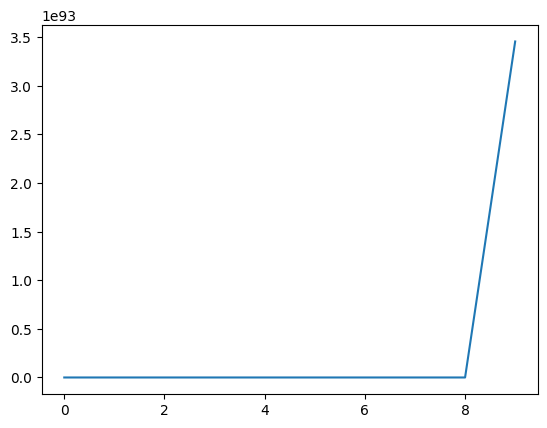

Time taken by perceptron: 0.058095693588256836
Weights ==> w0: -5.512515357708273e+45  w1: -1.0146028551405357e+45  w2: -1.5263557771905693e+45


In [ ]:
# using perceptron:

# Initialize weights and learning rate
w0 = 1
w1 = 54
w2 = 18
learning_rate = 0.01

# Initialize variables to track epochs and errors
epoch_count = 0
epoches = []
sum_square_error = []

start = time.time()

# Perform training for a maximum of 10 epochs
while epoch_count < 10:
    error = 0

    # Iterate through the dataset
    for index, row in products_dataframe.iterrows():
        predicted_value = summation_data(row['Candies (#)'], row['Mangoes (Kg)'], row['Milk Packets (#)'], w0, w1, w2)
        actual_value = row['Payment (Rs)']

        if predicted_value != actual_value:
            e = actual_value - predicted_value

            # Update weights using the perceptron learning rule
            w0 += learning_rate * e * row['Candies (#)']
            w1 += learning_rate * e * row['Mangoes (Kg)']
            w2 += learning_rate * e * row['Milk Packets (#)']

            error += e ** 2

    # Track the current epoch and error
    epoches.append(epoch_count)
    epoch_count += 1
    sum_square_error.append(error)

    # Check for convergence (error threshold)
    if error < 0.002:
        print("Converged at epoch count:", epoch_count)
        break

end = time.time()

# Plot the error over epochs
plt.plot(epoches, sum_square_error)
plt.show()

# Display results
print("Time taken by perceptron:", end - start)
print("Weights ==> w0:", w0, " w1:", w1, " w2:", w2)


# A7. Develop the belowNeural Network. Use learning rate (α) = 0.05 with a Sigmoid activation function. Learn the weights of the network using back-propagation algorithm to implement above provided AND gate logic.

In [ ]:
# Implements the sigmoid activation function.
def sigmoid_function(x):
    return 1/(1+math.e**-x)

In [ ]:
# Initialize weights and learning rate
V = [[1, -1], [1, 1]]
W = [1, 1]
learning_rate = 0.05

# Initialize variables for iterations and errors
iter = 0
error = 0
errors = []

# Training loop
while iter < 1000 and (error > 0.02 or error == 0):
    error = 0

    # Iterate through the AND logic table
    for index, row in and_table.iterrows():
        input_hidden = []
        hidden_out = []

        # Calculate input to hidden layer
        input_hidden.append(row['A'] * V[0][0] + row['B'] * V[1][0])
        input_hidden.append(row['A'] * V[0][1] + row['B'] * V[1][1])

        # Apply sigmoid activation function to hidden layer
        hidden_out.append(sigmoid_function(input_hidden[0]))
        hidden_out.append(sigmoid_function(input_hidden[1]))

        # Calculate output using the hidden layer
        output = sigmoid_function(hidden_out[0] * W[0] + (hidden_out[1] * W[1]))

        # Calculate error and deltas
        ERROR = row['result'] - output
        delta1 = ((ERROR) * output * (1 - output))
        delta2 = [
            delta1 * W[0] * hidden_out[0] * (1 - hidden_out[0]),
            delta1 * W[1] * hidden_out[1] * (1 - hidden_out[1])
        ]

        # Update weights for the output layer
        for i in range(len(W)):
            W[i] += learning_rate * delta1 * hidden_out[i]

        # Update weights for the hidden layer
        V[0][0] += learning_rate * delta2[0] * row['A']
        V[0][1] += learning_rate * delta2[1] * row['A']
        V[1][0] += learning_rate * delta2[0] * row['B']
        V[1][1] += learning_rate * delta2[1] * row['B']

        # Calculate the cumulative error for this iteration
        error += ERROR ** 2

    # Track errors and iterations
    errors.append(error)
    iter += 1


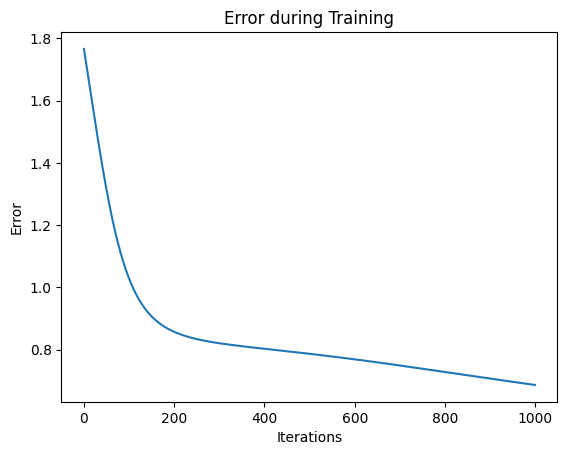

In [ ]:
# Plot the errors during the training
plt.plot(errors)
plt.xlabel('Iterations')
plt.ylabel('Error')
plt.title('Error during Training')
plt.show()

# A8. Repeat the above A1 experiment for XOR Gate logic. Keep the learning rate & activation function same as A1.

In [ ]:
# Initialize weights and learning rate
V = [[1, 1], [1, 1]]
W = [1, 1]
learning_rate = 0.05

# Initialize variables for iterations and errors
iter = 0
error = 0
errors = []

# Training loop
while iter < 1000 and (error > 0.02 or error == 0):
    error = 0

    # Iterate through the XOR logic table
    for index, row in xor_table.iterrows():
        input_hidden = []
        hidden_out = []

        # Calculate input to hidden layer
        input_hidden.append(row['A'] * V[0][0] + row['B'] * V[1][0])
        input_hidden.append(row['A'] * V[0][1] + row['B'] * V[1][1])

        # Apply sigmoid activation function to hidden layer
        hidden_out.append(sigmoid_function(input_hidden[0]))
        hidden_out.append(sigmoid_function(input_hidden[1]))

        # Calculate output using the hidden layer
        output = sigmoid_function(hidden_out[0] * W[0] + (hidden_out[1] * W[1]))

        # Calculate error and deltas
        ERROR = row['result'] - output
        delta1 = ((ERROR) * output * (1 - output))
        delta2 = [
            delta1 * W[0] * hidden_out[0] * (1 - hidden_out[0]),
            delta1 * W[1] * hidden_out[1] * (1 - hidden_out[1])
        ]

        # Update weights for the output layer
        for i in range(len(W)):
            W[i] += learning_rate * delta1 * hidden_out[i]

        # Update weights for the hidden layer
        V[0][0] += learning_rate * delta2[0] * row['A']
        V[0][1] += learning_rate * delta2[1] * row['A']
        V[1][0] += learning_rate * delta2[0] * row['B']
        V[1][1] += learning_rate * delta2[1] * row['B']

        # Calculate the cumulative error for this iteration
        error += ERROR ** 2

    # Track errors and iterations
    errors.append(error)
    iter += 1


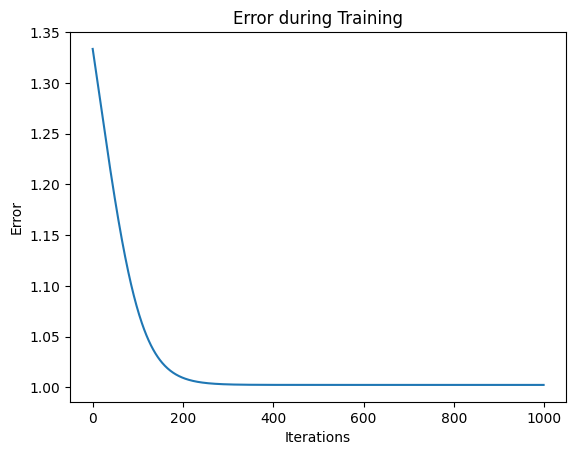

In [ ]:
# Plot the errors during the training
plt.plot(errors)
plt.xlabel('Iterations')
plt.ylabel('Error')
plt.title('Error during Training')
plt.show()

# A9. Repeat exercise A1 & A2 with 2 output nodes (as shown below). A zero output of logic gate maps to [O1O2] = [1 0] from output layer while a one output from logic gate maps to [0 1].

In [ ]:
# Initialize weights and learning rate
V = [[1, 1], [1, 1]]
W = [[1, 1], [1, 1]]
learning_rate = 0.05

# Initialize variables for iterations and errors
iter = 0
error = 0
errors = []
input_hidden = []
hidden_out = []

# Training loop
while iter < 1000 and (error > 0.02 or error == 0):
    error = 0

    # Iterate through the AND logic table
    for index, row in and_table.iterrows():
        O_array = [not (row['result']), row['result']]
        input_hidden = []
        hidden_out = []
        output = []
        ERROR = []

        # Calculate input to hidden layer
        input_hidden.append(row['A'] * V[0][0] + row['B'] * V[1][0])
        input_hidden.append(row['A'] * V[0][1] + row['B'] * V[1][1])

        # Apply sigmoid activation function to hidden layer
        hidden_out.append(sigmoid_function(input_hidden[0]))
        hidden_out.append(sigmoid_function(input_hidden[1]))

        # Calculate output using the hidden layer
        output.append(sigmoid_function(hidden_out[0] * W[0][0] + hidden_out[1] * W[1][0]))
        output.append(sigmoid_function(hidden_out[1] * W[1][1] + hidden_out[0] * W[0][1]))

        # Calculate error and deltas
        ERROR.append(O_array[0] - output[0])
        ERROR.append(O_array[1] - output[1])

        delta1 = [(ERROR[0]) * output[0] * (1 - output[0]), (ERROR[1]) * output[1] * (1 - output[1])]
        delta2 = [
            (delta1[0] * W[0][0] + delta1[1] * W[0][1]) * hidden_out[0] * (1 - hidden_out[0]),
            (delta1[0] * W[1][0] + delta1[1] * W[1][1]) * hidden_out[1] * (1 - hidden_out[1])
        ]

        # Update weights for the output layer
        W[0][0] += learning_rate * delta1[0] * hidden_out[0]
        W[0][1] += learning_rate * delta1[1] * hidden_out[0]
        W[1][0] += learning_rate * delta1[0] * hidden_out[1]
        W[1][1] += learning_rate * delta1[1] * hidden_out[1]

        # Update weights for the hidden layer
        V[0][0] += learning_rate * delta2[0] * row['A']
        V[0][1] += learning_rate * delta2[1] * row['A']
        V[1][0] += learning_rate * delta2[0] * row['B']
        V[1][1] += learning_rate * delta2[1] * row['B']

        # Calculate the cumulative error for this iteration
        error += (ERROR[0] ** 2 + ERROR[1] ** 2)

    # Track errors and iterations
    errors.append(error)
    iter += 1


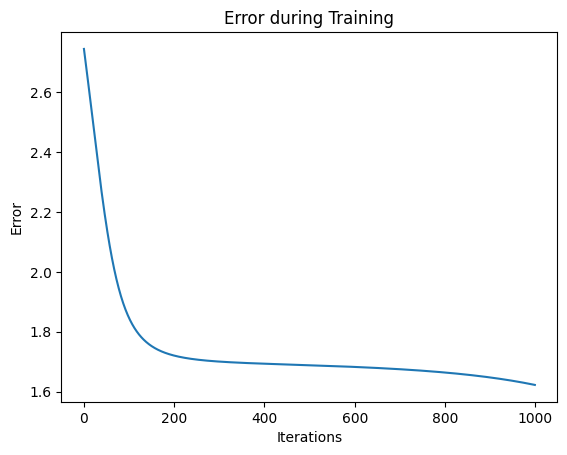

In [ ]:
# Plot the errors during the training
plt.plot(errors)
plt.xlabel('Iterations')
plt.ylabel('Error')
plt.title('Error during Training')
plt.show()

In [ ]:
import numpy as np

# Define the activation function (Step function)
def step_function(x):
    return 1 if x >= 0 else 0

# Define the sigmoid function for Experiment A2
def sigmoid_function(x):
    return 1 / (1 + np.exp(-x))

# Initialize weights and learning rate
w0 = -1.5
w1 = 1.2
w2 = 0.75
learning_rate = 0.05

# Define the AND gate truth table
and_table = [
    {'A': 0, 'B': 0, 'result': [1, 0]},  # Output: [1 0] for logic 0
    {'A': 0, 'B': 1, 'result': [1, 0]},  # Output: [1 0] for logic 0
    {'A': 1, 'B': 0, 'result': [1, 0]},  # Output: [1 0] for logic 0
    {'A': 1, 'B': 1, 'result': [0, 1]}   # Output: [0 1] for logic 1
]

# Training loop
epochs = 0
converged = False

while not converged and epochs < 1000:
    converged = True
    for row in and_table:
        inputs = [row['A'], row['B']]
        target_output = row['result']

        # Calculate perceptron output
        perceptron_output = [step_function(w0 + w1 * inputs[0] + w2 * inputs[1])]

        # Check for convergence
        if perceptron_output != target_output:
            converged = False

        # Update weights
        w0 += learning_rate * (target_output[0] - perceptron_output[0])
        w1 += learning_rate * (target_output[0] - perceptron_output[0]) * inputs[0]
        w2 += learning_rate * (target_output[0] - perceptron_output[0]) * inputs[1]

    epochs += 1

# Print final weights and epochs needed for convergence
print("Final Weights (w0, w1, w2):", w0, w1, w2)
print("Epochs needed for convergence:", epochs)


Final Weights (w0, w1, w2): 0.10000000000000077 -0.10000000000000055 -0.0500000000000001
Epochs needed for convergence: 1000


# A10. Learn using a MLP network from Sci-Kit manual available at https://scikit-learn.org/stable/modules/neural_networks_supervised.html. Repeat the AND Gate and XOR Gate exercises using MLPClassifier() function.

In [ ]:
# Import the MLPClassifier from scikit-learn
from sklearn.neural_network import MLPClassifier

# Create an MLPClassifier with specified parameters
MLP = MLPClassifier(
    hidden_layer_sizes=2,        # Number of hidden layers and units in each layer
    activation='logistic',       # Activation function for hidden layers ('logistic' for sigmoid)
    solver='sgd',                # Solver for weight optimization (Stochastic Gradient Descent)
    learning_rate_init=0.02,     # Initial learning rate
    max_iter=1000                # Maximum number of iterations
)


In [56]:
# Select input features (X) and target labels (Y) from the 'xor_table' DataFrame
X_xorTable = xor_table[['A', 'B']]
Y_xorTable = xor_table['result']

# Fit the MLPClassifier model on the input features and target labels
MLP.fit(X_xorTable, Y_xorTable)

# Calculate and print the accuracy score of the model on the same data
accuracy_score = MLP.score(X_xorTable, Y_xorTable)
print("Accuracy Score:", accuracy_score)
print(X_xorTable)

Accuracy Score: 0.25
   A  B
0  0  0
1  0  1
2  1  0
3  1  1


In [61]:
# Select input features (X) and target labels (Y) from the 'and_table' DataFrame
X_andTable = and_table[['A', 'B']]
Y_andTable = and_table['result']

# Fit the MLPClassifier model on the input features and target labels
MLP.fit(X_andTable, Y_andTable)

# Calculate and print the accuracy score of the model on the same data
accuracy_score = MLP.score(X_andTable, Y_andTable)
print("Accuracy Score:", accuracy_score)


Accuracy Score: 1.0


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


# A11. Use the MLPClassifier() function on your project dataset

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the dataset from a CSV file
data = pd.read_csv('face_mimic_df.csv')

# Use LabelEncoder to encode categorical labels into numeric values
label_encoder = LabelEncoder()
data['id'] = label_encoder.fit_transform(data['id'])

# Split the dataset into features (x) and the target label (y)
x = data.drop("diagnosed", axis=1)
y = data["diagnosed"]

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Create an MLPClassifier with specified parameters
mlp = MLPClassifier(
    hidden_layer_sizes=(100, 50),  # Number of units in each hidden layer
    activation='relu',             # Activation function for hidden layers ('relu' for rectified linear unit)
    solver='adam',                 # Solver for weight optimization
    max_iter=1000,                 # Maximum number of iterations
    random_state=42                # Random seed for reproducibility
)

# Fit the MLPClassifier model on the training data
mlp.fit(x_train, y_train)

# Calculate and print the accuracy score of the model on the training data
training_accuracy = mlp.score(x_train, y_train)
print("Training Accuracy Score:", training_accuracy)


Training Accuracy Score: 0.9225181598062954
